## NCEP3 Example

The Goddard Satellite-based Surface Turbulent Fluxes (GSSTF) Version 3 Dataset is a product of the NASA MEaSURES project. The dataset consists of 7,850 files in the HDF-EOS5 format. Each file contains one-day worth of data in the Equidistant Cylindrical projection on the global 0.25×0.25 degree grid cell. The dataset's temporal coverage is from July 1, 1987 to January 1, 2009. More information is available at https://disc.gsfc.nasa.gov/datasets/GSSTF_NCEP_V3/summary.

The 7,850 files have been aggregated to one domain hosted by HDF Kita at location: hdf5://shared/NASA/NCEP3/ncep3.he5.

This notebook illustrates how this data can be accessed using h5pyd.

In [30]:
%matplotlib inline
import h5pyd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation

In [31]:
f = h5pyd.File("hdf5://shared/NASA/NCEP3/ncep3.he5", "r")

In [32]:
list(f["/HDFEOS/GRIDS/NCEP/Data Fields"])

['Psea_level', 'Qsat', 'SST', 'Tair_2m']

In [33]:
tair2m = f["/HDFEOS/GRIDS/NCEP/Data Fields/Tair_2m"]
tair2m.shape

(7850, 720, 1440)

In [34]:
list(tair2m.attrs)

['_FillValue', 'long_name', 'units']

In [35]:
fill_value = tair2m.attrs['_FillValue'][0]
fill_value

-999.0

In [36]:
long_name = tair2m.attrs['long_name']
long_name = long_name.decode("ascii")
long_name

'2m air temperature'

In [37]:
%time units = tair2m.attrs['units']
units = units.decode("ascii")
units

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 8.81 ms


'C'

In [11]:
%time data = tair2m[7840,::,::]

CPU times: user 12 ms, sys: 8 ms, total: 20 ms
Wall time: 78 ms


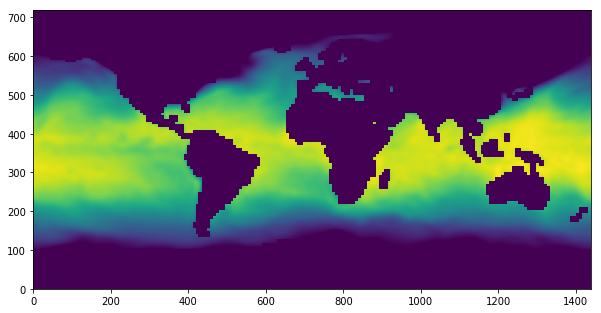

In [12]:
plt.figure(1, figsize=(10,10),dpi=72)
plt.imshow(data, origin="lower", vmin=0, vmax=30)

In [17]:
tair2m[9999,700,100]
#plt.figure(1, figsize=(10,10),dpi=72)
#plt.imshow(data, origin="lower", vmin=-20, vmax=40)   

ValueError: Index (9999) out of range (0-7849)

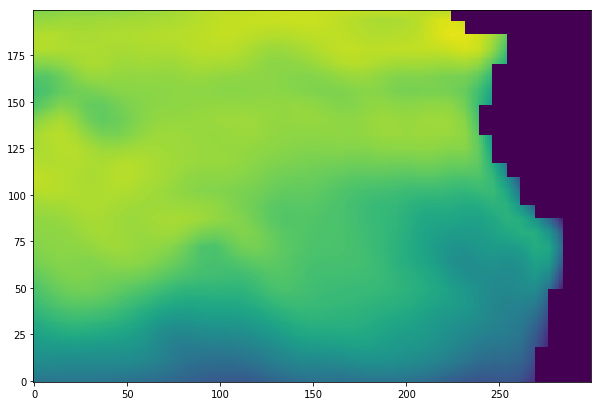

In [14]:
plt.figure(1, figsize=(10,10),dpi=72)
plt.imshow(data[200:400, 150:450], origin="lower", vmin=11, vmax=30)  

In [18]:
non_fill = data[data != fill_value]

In [19]:
histo = np.histogram(non_fill, bins=1000)

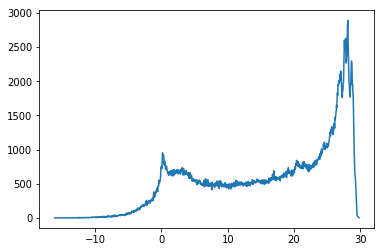

In [20]:
plt.plot(histo[1][:-1], histo[0])

In [26]:
start_index = 0
end_index = 7850   # set end_index to value between 1 an 7850
%time tseries = tair2m[start_index:end_index, 350, 600]

CPU times: user 24 ms, sys: 4 ms, total: 28 ms
Wall time: 28.4 s


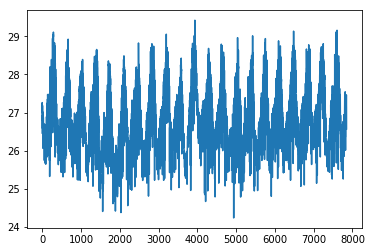

In [27]:
x = range(start_index,end_index)
plt.plot(x, tseries)

In [28]:
# calculate mean, median, stddev, min, max
end_index = 1000
summaries = np.zeros((end_index-start_index, 5))
def calc_summaries():
    for i in range(start_index, end_index):
        data = tair2m[i, :,:]
        non_fill = data[data != fill_value]
        summary = (np.mean(non_fill), np.median(non_fill), np.std(non_fill), np.min(non_fill), np.max(non_fill))
        summaries[i] = summary
%time calc_summaries()

CPU times: user 13.6 s, sys: 8.28 s, total: 21.8 s
Wall time: 1min 3s


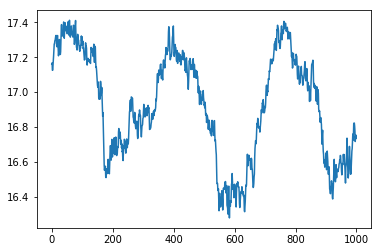

In [29]:
x = range(start_index,end_index)
#plt.plot(x, summaries[:,0], x, summaries[:,3], x, summaries[:,4])
plt.plot(x, summaries[:,0])